https://www.pnas.org/action/downloadSupplement?doi=10.1073%2Fpnas.2118631119&file=pnas.2118631119.sd01.xlsx

https://pubmed.ncbi.nlm.nih.gov/35254913/

https://gist.github.com/davidad/068fc4e2ccd5166c943156bbaca6a11b

/var/folders/kd/1_0jdwrj7y7__4d54x93mg3h0000gn/T/ipykernel_3085/2226283077.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['condition_min'] = df_filtered['condition'].apply(lambda x: 30 if x=='30+ (ud/dL)' else float(x.split('-')[0]))


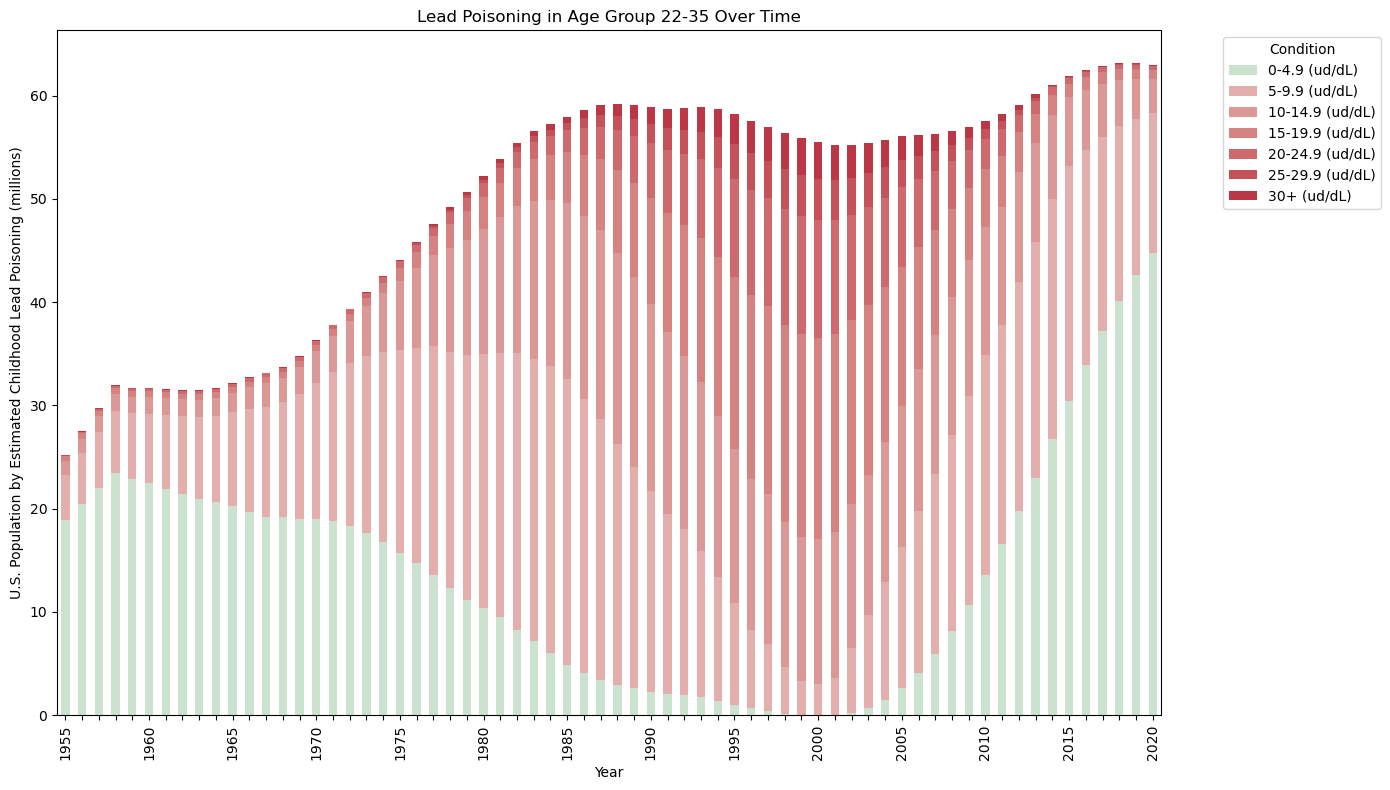

In [2]:
import pandas as pd

# Load the data
df = pd.read_excel('pnas.2118631119.sd01.xlsx')


import matplotlib.pyplot as plt

# Filter the data for ages 22-35
df_filtered = df[(df['AGE'] >= 22) & (df['AGE'] <= 35) & (df['YEAR'] >= 1955) & (df['YEAR'] <= 2040)]

# Create a new column 'condition_min' to hold the minimum value of each range
df_filtered['condition_min'] = df_filtered['condition'].apply(lambda x: 30 if x=='30+ (ud/dL)' else float(x.split('-')[0]))

# Pivot the data to get years as index, conditions as columns and leadpop as values
df_pivot = df_filtered.pivot_table(index='YEAR', columns=['condition_min', 'condition'], values='leadpop', aggfunc='sum')

# Sort the columns by 'condition_min'
df_pivot = df_pivot.sort_index(axis=1, level='condition_min')

# Scale to millions
df_pivot = df_pivot / 1e6

# Drop the 'condition_min' level in the column index
df_pivot.columns = df_pivot.columns.droplevel('condition_min')

# Create a function to format the x-axis labels
def format_year_labels(year):
    if year % 5 == 0:
        return str(year)
    else:
        return ''

# Define color palette
colors = ['#eaf2f0', '#e2afac', '#dc9896', '#d68281', '#ce6a6d', '#c65259', '#bc3746']

# Update color palette
colors[0] = '#cbe3ce'

# Create the stacked bar chart with the updated color palette
fig, ax = plt.subplots(figsize=(14, 8))
df_pivot.plot(kind='bar', stacked=True, ax=ax, color=colors, grid=False)

# Format y-axis labels to display in millions
ax.yaxis.get_major_formatter().set_scientific(False)

# Remove x-axis grid lines
ax.xaxis.grid(False)

# Apply custom formatting to x-axis labels
ax.set_xticklabels([format_year_labels(year) for year in df_pivot.index])

plt.title('Lead Poisoning in Age Group 22-35 Over Time')
plt.xlabel('Year')
plt.ylabel('U.S. Population by Estimated Childhood Lead Poisoning (millions)')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()